# 피싱 웹 사이트 분석

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [4]:
df = pd.read_csv('phishing_Data.csv') #데이터 불러오기

In [5]:
display(df.head())

,-1,1,1.1,1.2,-1.1,-1.2,-1.3,-1.4,-1.5,1.3,...,1.9,1.10,-1.11,-1.12,-1.13,-1.14,1.11,1.12,-1.15,-1.16
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [6]:
df.columns=['IP_Address','URL_Length','Shortining_Service','Have_Symbol','slash_redirect','Prefix_Suffix','Sub_Domain','SSL_state','Https','Domain_regist','Favicon','standard_port','HTTPS_token','Request_URL','Anchor','Links_tag','SFH','Submit_email','Abnormal_URL','website_Forwarding','Status_Bar','RightClick','popUpwindow','Iframe','age_Domain','DNSRecord','Web_traffic','page_rank','Google_index','LInks_point','Statistic_report']

In [14]:
df.head()

,IP_Address,URL_Length,Shortining_Service,Have_Symbol,slash_redirect,Prefix_Suffix,Sub_Domain,SSL_state,Https,Domain_regist,...,RightClick,popUpwindow,Iframe,age_Domain,DNSRecord,Web_traffic,page_rank,Google_index,LInks_point,Statistic_report
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [8]:
df.isnull().sum() #결측치 확인

IP_Address            0
URL_Length            0
Shortining_Service    0
Have_Symbol           0
slash_redirect        0
Prefix_Suffix         0
Sub_Domain            0
SSL_state             0
Https                 0
Domain_regist         0
Favicon               0
standard_port         0
HTTPS_token           0
Request_URL           0
Anchor                0
Links_tag             0
SFH                   0
Submit_email          0
Abnormal_URL          0
website_Forwarding    0
Status_Bar            0
RightClick            0
popUpwindow           0
Iframe                0
age_Domain            0
DNSRecord             0
Web_traffic           0
page_rank             0
Google_index          0
LInks_point           0
Statistic_report      0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
plt.style.use('seaborn') # seaborn 스타일로 변환 (기본은 못생겼어요..)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


# 2) 피쳐 분석

2)URL_Length 

In [11]:
Url = df['URL_Length'].value_counts()
Url

-1    8960
 1    1959
 0     135
Name: URL_Length, dtype: int64

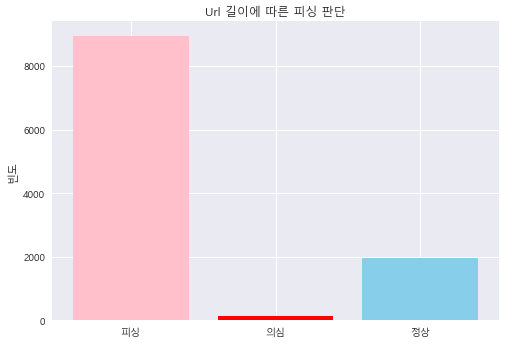

In [12]:
plt.bar(Url.index,Url, color =['pink','skyblue','red']) # x는 인덱스, y는 빈도수, color로 색 지정
plt.xticks(Url.index, ['피싱','정상','의심']) # x축을 여자,남자 범주로 변환
plt.title('Url 길이에 따른 피싱 판단')
plt.ylabel('빈도')
plt.show()

URL_Length가 54보다 작으면 1, 54와 75사이면 0, 75이상이면 -1로 분류

3) Shortining_Service

In [17]:
short_service = df['Shortining_Service'].value_counts()
short_service

 1    9610
-1    1444
Name: Shortining_Service, dtype: int64

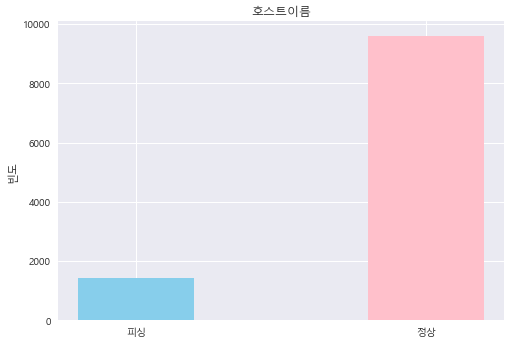

In [25]:
plt.bar(short_service.index, short_service, color =['pink','skyblue']) # x는 인덱스, y는 빈도수, color로 색 지정
plt.xticks(short_service.index, ['정상','피싱']) # x축을 여자,남자 범주로 변환
plt.title('호스트이름')
plt.ylabel('빈도')
plt.show()

호스트이름이 short_url과 같다면 -1로 피싱, 아니라면 1로 정상

3) Have Symbol

In [23]:
symbol = df['Have_Symbol'].value_counts()
symbol

 1    9399
-1    1655
Name: Have_Symbol, dtype: int64

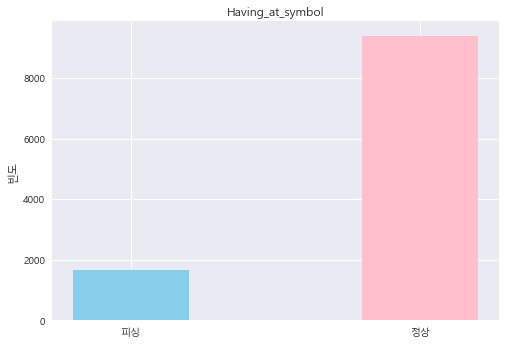

In [29]:
plt.bar(symbol.index, symbol, color =['pink','skyblue']) # x는 인덱스, y는 빈도수, color로 색 지정
plt.xticks(symbol.index, ['정상','피싱']) # x축을 여자,남자 범주로 변환
plt.title('Having_at_symbol')
plt.ylabel('빈도')
plt.show()

만약 url에서 @이 있다면 -1로 피싱, 아니라면 정상

# 3) 머신러닝 종류별로 돌려보기

In [18]:
inputs = df.iloc[:,:-1]
outputs = df.iloc[:, -1]

In [20]:
# 정상 및 피싱 사이트 2000개 훈련
training_inputs = inputs[:2000]
training_outputs = outputs[:2000]

testing_inputs = inputs[2000:]
testing_outputs = outputs[2000:] 

In [24]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(training_inputs, training_outputs)

predictions = classifier.predict(testing_inputs)

accuracy = 100.0* accuracy_score(testing_outputs, predictions)
print("Logistic regression accuracy =", str(accuracy))

Logistic regression accuracy = 84.94588027391208


In [26]:
#Decision regression
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(training_inputs, training_outputs)

predictions = classifier.predict(testing_inputs)

accuracy = 100.0* accuracy_score(testing_outputs, predictions)
print("DecisionTree accuracy =", str(accuracy))

DecisionTree accuracy = 90.52352551358516


In [27]:
# RandomForest
from sklearn import ensemble

classifier = ensemble.RandomForestClassifier()
classifier.fit(training_inputs, training_outputs)

predictions = classifier.predict(testing_inputs)

accuracy = 100.0* accuracy_score(testing_outputs, predictions)
print("RandomForest accuracy =", str(accuracy))

RandomForest accuracy = 91.48442677269715


In [ ]:
# 1. autoML
# 2. pipeline
# 3. 특별한 데이터

In [30]:
# 파이프라인


from sklearn.pipeline import Pipeline

from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import Imputer, StandardScaler

from sklearn.preprocessing import OnehotEncoder, CategoricalEncoder





num_attr = list(housing_num)

cat_attr = ["ocean_proximity"]



# 숫자형 변수를 전처리하는 Pipeline

num_pipeline = Pipeline([

    ('selector', DataFrameSelector(num_attr)),

    ('imputer', Imputer(strategy = 'median')),

    ('std_scaler', StandardScaler())

])



# 범주형 변수를 전처리하는 Pipeline

cat_pipeline = Pipeline([

    ('selector', DataFrameSelector(cat_attr)),

    ('cat_encoder', CategoricalEncoder(encoding = 'onehot-dense'))

])



# num_pipeline과 cat_pipeline을 합치는 FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [

  ('num_pipeline', num_pipeline),

  ('cat_pipeline', cat_pipeline),

  ])



# 전체 파이프라인 실행  

housing_prepared = full_pipeline.fit_transform(housing)

print(housing_prepared)

ImportError: cannot import name 'OnehotEncoder'